ERROR: Could not find a version that satisfies the requirement google-colab-patches (from versions: none)
ERROR: No matching distribution found for google-colab-patches


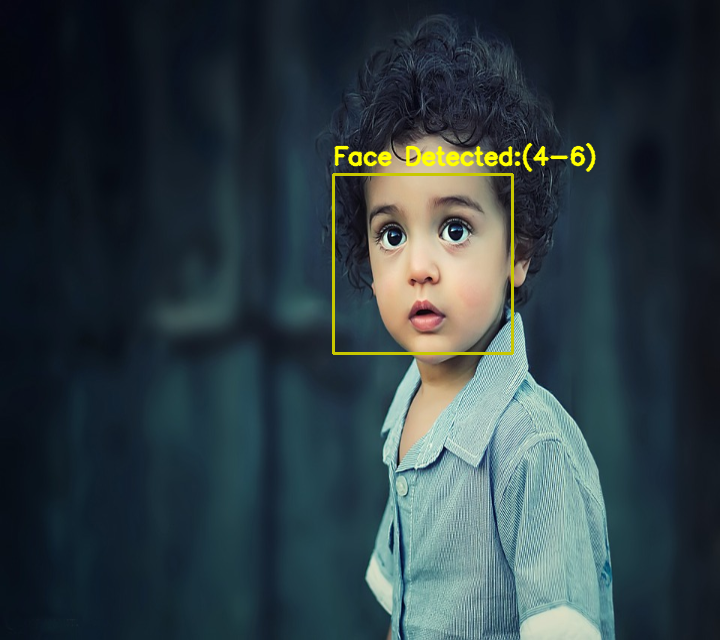

In [ ]:
import cv2
import dlib
import numpy as np

# Install the necessary package for displaying images in Colab
!pip install google-colab-patches

# Import the necessary module for displaying images in Colab
from google.colab.patches import cv2_imshow

img = cv2.imread('kid1.jpg')
img = cv2.resize(img, (720, 640))
frame = img.copy()

# ------------ Model for Age detection --------#
age_weights = "age_deploy.prototxt"
age_config = "age_net.caffemodel"
age_Net = cv2.dnn.readNet(age_config, age_weights)

# Model requirements for image
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
		'(25-32)', '(38-43)', '(48-53)', '(60-100)']
model_mean = (78.4263377603, 87.7689143744, 114.895847746)

# storing the image dimensions
fH = img.shape[0]
fW = img.shape[1]

Boxes = [] # to store the face co-ordinates
mssg = 'Face Detected' # to display on image

# ------------- Model for face detection---------#
face_detector = dlib.get_frontal_face_detector()
# converting to grayscale
img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# -------------detecting the faces--------------#
faces = face_detector(img_gray)

# If no faces our detected
if not faces:
	mssg = 'No face detected'
	cv2.putText(img, f'{mssg}', (40, 40),
				cv2.FONT_HERSHEY_SIMPLEX, 2, (200), 2)
	# Use cv2_imshow instead of cv2.imshow
	cv2_imshow(img)
	cv2.waitKey(0)

else:
	# --------- Bounding Face ---------#
	for face in faces:
		x = face.left() # extracting the face coordinates
		y = face.top()
		x2 = face.right()
		y2 = face.bottom()

		# rescaling those coordinates for our image
		box = [x, y, x2, y2]
		Boxes.append(box)
		cv2.rectangle(frame, (x, y), (x2, y2),
					(00, 200, 200), 2)

	for box in Boxes:
		face = frame[box[1]:box[3], box[0]:box[2]]

		# ----- Image preprocessing --------#
		blob = cv2.dnn.blobFromImage(
			face, 1.0, (227, 227), model_mean, swapRB=False)

		# -------Age Prediction---------#
		age_Net.setInput(blob)
		age_preds = age_Net.forward()
		age = ageList[age_preds[0].argmax()]

		cv2.putText(frame, f'{mssg}:{age}', (box[0],
											box[1] - 10),
					cv2.FONT_HERSHEY_SIMPLEX, 0.8,
					(0, 255, 255), 2, cv2.LINE_AA)
		# Use cv2_imshow instead of cv2.imshow
		cv2_imshow(frame)
		cv2.waitKey(0)